In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
from math import pi
import math
# import trade_model as td
import matplotlib.pyplot as plt

D:\Programs\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Loading the Data

In [2]:
df = pd.read_csv("C:\\Users\\Milad Mizazadeh\\Desktop\\data.csv")
df = df[np.logical_and(df.year>=1391 , df.year<=1395)]

In [3]:
df

,date,name,amount,volume,value,lastday,open,close,last-change,last-percent,...,adj_high,adj_close,adj_open,adj_ending,log_adj_open,log_adj_close,log_adj_ending,log_adj_low,log_adj_high,adj_scale
239,3/24/2012,ظ¾ط§ط±ط³â€Œ ط®ظˆط¯ط±ظˆ,18,433603,4.441051e+08,986,1006,1025,39,3.96,...,195.166117,195.166117,191.548404,190.977186,2.282279,2.290404,2.280981,2.282279,2.290404,1.0
240,3/25/2012,ظ¾ط§ط±ط³â€Œ ط®ظˆط¯ط±ظˆ,47,231214,2.368620e+08,1003,1043,1018,15,1.50,...,198.593425,193.833276,198.593425,191.929216,2.297965,2.287428,2.283141,2.284002,2.297965,1.0
241,3/26/2012,ظ¾ط§ط±ط³â€Œ ط®ظˆط¯ط±ظˆ,56,553041,5.546479e+08,1008,1030,1010,2,0.20,...,196.118147,192.310028,196.118147,191.357998,2.292518,2.284002,2.281847,2.274877,2.292518,1.0
242,3/27/2012,ظ¾ط§ط±ط³â€Œ ط®ظˆط¯ط±ظˆ,54,481914,4.879160e+08,1005,983,1000,-5,-0.50,...,194.214087,190.405968,187.169067,192.119622,2.272234,2.279681,2.283572,2.272234,2.288281,1.0
243,3/28/2012,ظ¾ط§ط±ط³â€Œ ط®ظˆط¯ط±ظˆ,33,295818,2.980340e+08,1009,1010,1006,-3,-0.30,...,193.833276,191.548404,192.310028,192.119622,2.284002,2.282279,2.283572,2.280115,2.287428,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,3/12/2017,ع¯ط±ظˆظ‡â€Œط¨ظ‡ظ…ظ†â€Œ,122,1382018,2.415333e+09,1748,1746,1744,-4,-0.23,...,562.776756,559.568223,560.209930,560.851636,2.748351,2.747853,2.748848,2.746856,2.750336,1.0
10691,3/13/2017,ع¯ط±ظˆظ‡â€Œط¨ظ‡ظ…ظ†â€Œ,168,2001296,3.513205e+09,1748,1742,1752,4,0.23,...,567.910410,562.135050,558.926516,563.097610,2.747355,2.749841,2.750584,2.747355,2.754280,1.0
10692,3/14/2017,ع¯ط±ظˆظ‡â€Œط¨ظ‡ظ…ظ†â€Œ,149,2041389,3.588639e+09,1755,1780,1751,-4,-0.23,...,574.327476,561.814196,571.118943,564.060170,2.756727,2.749593,2.751325,2.748848,2.759160,1.0
10693,3/15/2017,ع¯ط±ظˆظ‡â€Œط¨ظ‡ظ…ظ†â€Œ,168,3006003,5.256224e+09,1758,1743,1746,-12,-0.68,...,571.760650,560.209930,559.247369,561.172489,2.747604,2.748351,2.749096,2.746106,2.757214,1.0


# Data Preprocessing 

### Correcting the name column

In [3]:

def name(i):
    if i == df.name.unique()[0]:
        return("خساپا")
    if i == df.name.unique()[2]:
        return("خپارس")
    if i == df.name.unique()[3]:
        return("خودرو")
    if i == df.name.unique()[4]:
        return("ورنا")
    if i == df.name.unique()[5]:
        return("خزامیا")
    if i == df.name.unique()[1]:
        return("خبهمن")
df.name = [name(i) for i in df.name]

In [4]:
df = df.drop(['diff_low_high', 'diff_open', 'adj_scale'],axis=1)

In [5]:
# Dropping missing values
df = df.dropna()

## Adding five day return based on the Close price 

In [6]:
new_closes = list(df.close.iloc[5:].values)

new_closes.extend([0,0,0,0,0])

df["next_close"] = new_closes

In [7]:
df2 = df.loc[:,["close","next_close"]]

In [8]:
def convert_profit_to_bool(profit):
    if profit >= 0.10:
        return(1)
    elif profit <= -0.10:
        return(-1)
    else:
        return(0)

In [9]:
price = [convert_profit_to_bool((row.next_close-row.close)) for _,row in df2.iterrows()]
df["increase"] = price

## Adding useful features for association rule mining

### Defining functions for technical analysis indicators 
Indicators we'll use in this section : 
    * RSI
    * Stochastic Oscillator
    * 61 Columns of Candle stick indicators
   

In [10]:
import talib

In [11]:
def candle_patterns_signal(df):
    '''
    This function will return a value from {-1,0,1} .
    0 return means this indicator is not giving any signal
    1 return means this indicator is giving a buy signal 
    -1 return means this indicator is giving a sell signal 
    '''
    final_result = []
    
    function_names = ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS',
    'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK',
    'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE',
    'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON',
    'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE',
    'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 
    'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN','CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDLTHRUSTING',
    'CDLTRISTAR', 'CDLUNIQUE3RIVER', 'CDLUPSIDEGAP2CROWS', 'CDLXSIDEGAP3METHODS']

    open = np.array(df.open, dtype=float)
    high = np.array(df.high, dtype=float)
    low = np.array(df.low, dtype=float)
    close = np.array(df.close, dtype=float)

    for func_name in function_names:
        result = getattr(talib,func_name)(open, high, low, close)
        final_result.append(result/100)
    
    final_result = np.array(final_result)
    final_result = final_result.T

    return pd.DataFrame(final_result, columns=function_names)

# Mining information and knowledge from data

## Defining crossover function which will be used in next indicator functions

In [13]:
# only +1 is valid . -1 doesnt mean any thing 

def crossover(series1, series2):
    
    if type(series1) in [int, float]:
        series1 = pd.Series(series1, index=range(len(series2)))
    if type(series2) in [int, float]:
        series2 = pd.Series(series2, index=range(len(series1)))

    arr1 = np.array(series1)
    arr2 = np.array(series2)
    
    ser1 = pd.Series(np.where(arr1 > arr2 ,1.0, 0.0)).diff() # for +1 ones 
    ser1.loc[ser1[ser1 == -1].index] = 0 # deleting -1 ones . because they're wrong
    
    ser2 = pd.Series(np.where(arr2 > arr1 ,1.0, 0.0)).diff() # for -1 ones
    ser1.loc[ser2[ser2 == 1].index] = -1 # replacing -1 ones in main series
    ser1.iloc[0] = 0
    return(ser1)

In [14]:
def RSI(df):
    final_ser = pd.Series(0,index=df.index)
    rsi = talib.RSI(df.close.values.astype(float))
    top_crosses = crossover(rsi, 70)
    top_crosses.index = df.index
    final_ser.loc[top_crosses[top_crosses == 1].index] = -1
    
    buttom_crosses = crossover(30, rsi)
    buttom_crosses.index = df.index
    final_ser.loc[buttom_crosses[buttom_crosses == 1].index] = 1
    
    
    return final_ser

In [15]:
d = RSI(df)
d[np.logical_or(d==1, d==-1)]

298      1
314      1
353     -1
379      1
381      1
        ..
10609    1
10612    1
10617    1
10620    1
10647    1
Length: 209, dtype: int64

In [16]:
def STOCH(df):
    
    k, d = talib.STOCH(high=df.high, low=df.low, close=df.close)
    k.loc[k[k.isnull()].index] = 0
    d.loc[d[d.isnull()].index] = 0
    
    crosses = crossover(k, d)    
    crosses.index = k.index
    buy_signals_index = k[np.logical_and(k>80, crosses == 1)].index

    sell_signals_index = k[np.logical_and(k>80, crosses==-1)].index
    final_ser = pd.Series(0 ,index=k.index)
    final_ser.loc[buy_signals_index] = 1
    final_ser.loc[sell_signals_index] = -1
    
    return final_ser

## Seperate different namads ( every df_panel cell contains just one company dataframe ) 

In [17]:
df_panel = [] 
df_panel.append(df[df.name == "خساپا"])
df_panel.append(df[df.name == "خپارس"])
df_panel.append(df[df.name == "خودرو"])
df_panel.append(df[df.name == "ورنا"])
df_panel.append(df[df.name == "خزامیا"])
df_panel.append(df[df.name == "خبهمن"])


## ِDefining association rule mining function

In [18]:
def apriori(df , min_sup, min_conf, min_lift, min_length):
    import pandas as pd
    from apyori import apriori
    store_data = df.loc[:,"listed_tags"]
    association_rules = apriori(store_data, min_support=min_sup, min_confidence=min_conf, min_lift=min_lift, min_length=min_length)
    association_rules = list(association_rules)

    return(association_rules)


## Mining Association Rules between 63 stock indicators and the price of namads:

## An example of reverse one-hot encoding in our context : 

In [21]:
rsi_list = pd.DataFrame(RSI(df_panel[0]).values, columns = ["RSI"], index = df_panel[0].index)
stoch_list = pd.DataFrame(STOCH(df_panel[0]).values, columns = ["STOCH"], index = df_panel[0].index)
result = pd.concat([df_panel[0], rsi_list, stoch_list], axis=1)
result = result.loc[:, ["increase", "RSI", "STOCH"]]
result['tags']='' # to create an empty column

for col_name in result.columns:
    result.loc[result[col_name]==1,'tags']= result['tags']+' '+col_name
    result.loc[result[col_name]==-1,'tags']= result['tags']+' '+ "n{}".format(col_name)
result["listed_tags"] = [row.tags.split(" ")[1:] for _,row in result.iterrows()]
print(result[result.RSI>0])
# We're gonna work with "listed_tags" column for Apriori function :)

      increase  RSI  STOCH            tags       listed_tags
298         -1    1      0   nincrease RSI  [nincrease, RSI]
314          1    1      0    increase RSI   [increase, RSI]
379          1    1      0    increase RSI   [increase, RSI]
381          1    1      0    increase RSI   [increase, RSI]
718          1    1      0    increase RSI   [increase, RSI]
768         -1    1      0   nincrease RSI  [nincrease, RSI]
991          1    1      0    increase RSI   [increase, RSI]
1203         1    1      0    increase RSI   [increase, RSI]
1226         1    1      0    increase RSI   [increase, RSI]


### Aggregating all indicators into the main dataframe ( One Hot Encoding ) 

In [22]:
for i in range(len(df_panel)):
    rsi_list = pd.DataFrame(RSI(df_panel[i]).values, columns = ["RSI"], index = df_panel[i].index)
    stoch_list = pd.DataFrame(STOCH(df_panel[i]).values, columns = ["STOCH"], index = df_panel[i].index)
    candle_patterns_df = pd.DataFrame(candle_patterns_signal(df_panel[i]).values,columns=candle_patterns_signal(df_panel[i]).columns, index=df_panel[i].index)
    result = pd.concat([df_panel[i], rsi_list, stoch_list], axis=1)
    result = result.loc[:, ["increase", "RSI", "STOCH"]]
    result = pd.concat([result, candle_patterns_df], axis=1)
    
    result['tags']='' # to create an empty column

    for col_name in result.columns:
        result.loc[result[col_name]==1,'tags']= result['tags']+' '+col_name
        result.loc[result[col_name]==-1,'tags']= result['tags']+' '+ "n{}".format(col_name)

    result["listed_tags"] = [row.tags.split(" ")[1:] for _,row in result.iterrows()]
    x =  apriori(result,0.05,0.2, 1,2)
    k =0
    print("\n\n ----------------- Association Rules of {} -----------------\n".format(list(["خساپا", "خپارس","خودرو" ,"ورنا" , "خزامیا","خبهمن"])[i]))
    for j in range(len(x)):
        a = x[j][2]
        b = np.array(list(a[0][1]))
        if(("increase" in b or "nincrease" in b) and len(np.array(list(a[0][0])))!=0):
            print("Rule {}: {} -----> {}".format(k+1,np.array(list(a[0][0])),np.array(list(a[0][1]))))
            k+=1



 ----------------- Association Rules of خساپا -----------------

Rule 1: ['CDLCLOSINGMARUBOZU'] -----> ['nincrease']
Rule 2: ['CDLDOJI'] -----> ['increase']
Rule 3: ['CDLLONGLEGGEDDOJI'] -----> ['increase']
Rule 4: ['CDLSHORTLINE'] -----> ['increase']
Rule 5: ['nCDLCLOSINGMARUBOZU'] -----> ['increase']
Rule 6: ['nCDLLONGLINE'] -----> ['increase']
Rule 7: ['nCDLBELTHOLD'] -----> ['nincrease']
Rule 8: ['CDLDOJI'] -----> ['CDLLONGLEGGEDDOJI' 'increase']
Rule 9: ['CDLDOJI'] -----> ['CDLLONGLEGGEDDOJI' 'nincrease']
Rule 10: ['nCDLBELTHOLD'] -----> ['nincrease' 'nCDLLONGLINE']
Rule 11: ['nCDLCLOSINGMARUBOZU'] -----> ['nincrease' 'nCDLLONGLINE']


 ----------------- Association Rules of خپارس -----------------

Rule 1: ['CDLDOJI'] -----> ['increase']
Rule 2: ['CDLLONGLEGGEDDOJI'] -----> ['increase']
Rule 3: ['CDLSHORTLINE'] -----> ['increase']
Rule 4: ['nCDLBELTHOLD'] -----> ['increase']
Rule 5: ['nCDLLONGLINE'] -----> ['increase']
Rule 6: ['nCDLCLOSINGMARUBOZU'] -----> ['nincrease']
Rule 7

# Stocks price diagram trendlines 

In [12]:
df = pd.read_csv("C:\\Users\\Milad Mizazadeh\\Desktop\\data.csv")
df = df[np.logical_and(df.year>=1391 , df.year<=1395)]
def name(i):
    if i == df.name.unique()[0]:
        return("خساپا")
    if i == df.name.unique()[2]:
        return("خپارس")
    if i == df.name.unique()[3]:
        return("خودرو")
    if i == df.name.unique()[4]:
        return("ورنا")
    if i == df.name.unique()[5]:
        return("خزامیا")
    if i == df.name.unique()[1]:
        return("خبهمن")
df.name = [name(i) for i in df.name]

In [80]:
df_panel = [] 
df_panel.append(df[df.name == "خساپا"])
df_panel.append(df[df.name == "خپارس"])
df_panel.append(df[df.name == "خودرو"])
df_panel.append(df[df.name == "ورنا"])
df_panel.append(df[df.name == "خزامیا"])
df_panel.append(df[df.name == "خبهمن"])

In [96]:
accepted_error=0.015

def find_optimum_points(data : list, ismax : bool = True, days = 5):# if input = dataframe it takes 50 times more time
    last = -1000
    x, y = [], []
    if ismax:
        for j in range(len(data)): 
            if (j > days) and (j + days < len(data)):
                if (data[j] >= max(data[j - days: j + days]) and last < j - days):
                    last = j
                    x.append(j)
                    y.append(data[j])
    if not(ismax):
        for j in range(len(data)): 
            if (j > days) and (j + days < len(data)):
                if (data[j]<=min(data[j - days: j + days]) and last < j - days):
                    last = j
                    x.append(j)
                    y.append(data[j])
    df=pd.DataFrame({"x":x ,"y":y})
    return df




#########################################################################
#########################################################################
#########################################################################
#########################################################################


def find_trendlines(df, minimum_touch = 3, mode = "res"): # mode can be either "res" or "sup"
    df["date"] = df.index
    
    if mode == "res":
        final_points = []
        points = find_optimum_points(df.log_adj_close.tolist())
        for p1 in range(len(points)):
            for p2 in range(p1+1, len(points)):
                a = (points.y[p2] - points.y[p1]) / (points.x[p2] - points.x[p1])
                b = points.y[p1] - (a * points.x[p1])
                if len(points[p1:p2][points.x*a+b < points.y + math.log10(1 - accepted_error)]) == 0 :
                    if len(points[p1:p2][np.logical_and(points.x * a + b >= points.y + math.log10(1 - accepted_error) ,
                                                 points.x * a + b <= points.y + math.log10(1 + accepted_error))])>= minimum_touch:

                        final_points.append([points.x[p1], points.x[p2], a, b])
        return final_points
    
    if mode == "sup":
        final_points = []
        points = find_optimum_points(df.log_adj_close.tolist(), ismax=False)
        for p1 in range(len(points)):
            for p2 in range(p1+1, len(points)):
                a = (points.y[p2] - points.y[p1]) / (points.x[p2] - points.x[p1])
                b = points.y[p1] - (a * points.x[p1])
                if len(points[p1:p2][points.x*a+b > points.y + math.log10(1 + accepted_error)]) == 0 :
                    if len(points[p1:p2][np.logical_and(points.x * a + b >= points.y + math.log10(1 - accepted_error) ,
                                                 points.x * a + b <= points.y + math.log10(1 + accepted_error))])>= minimum_touch:

                        final_points.append([points.x[p1], points.x[p2], a, b])
        return final_points

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:71: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:75: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:55: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:59: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



نمودار مربوط به خساپا و خطوط روند مربوط به آن 


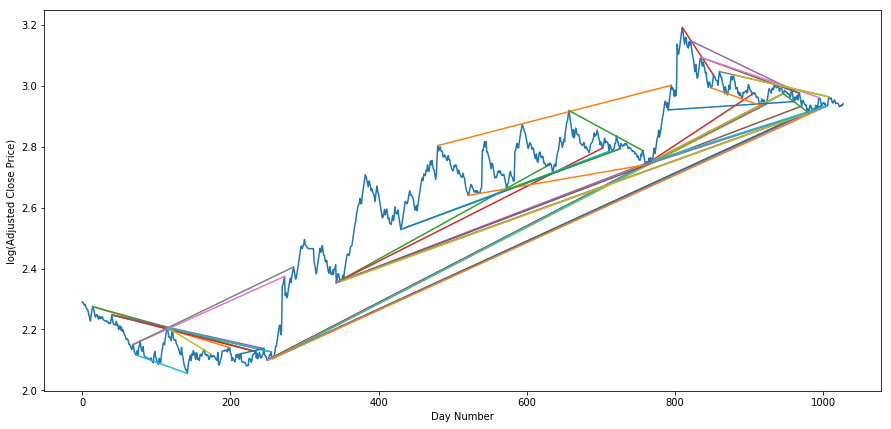

نمودار مربوط به خپارس و خطوط روند مربوط به آن 


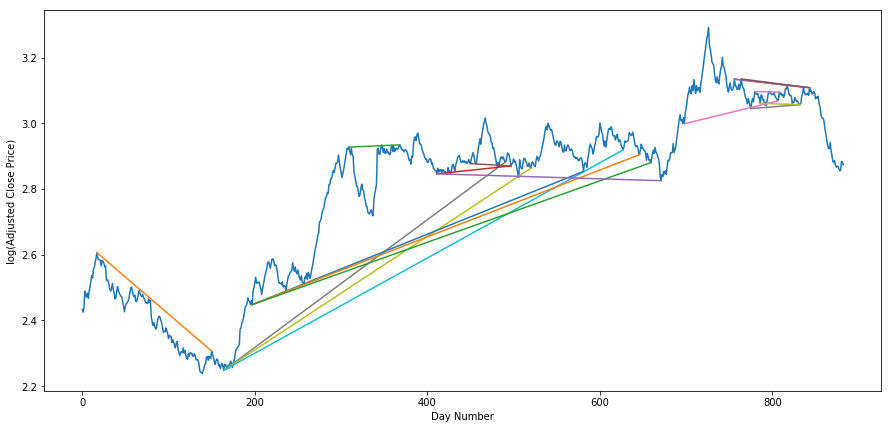

نمودار مربوط به خودرو و خطوط روند مربوط به آن 


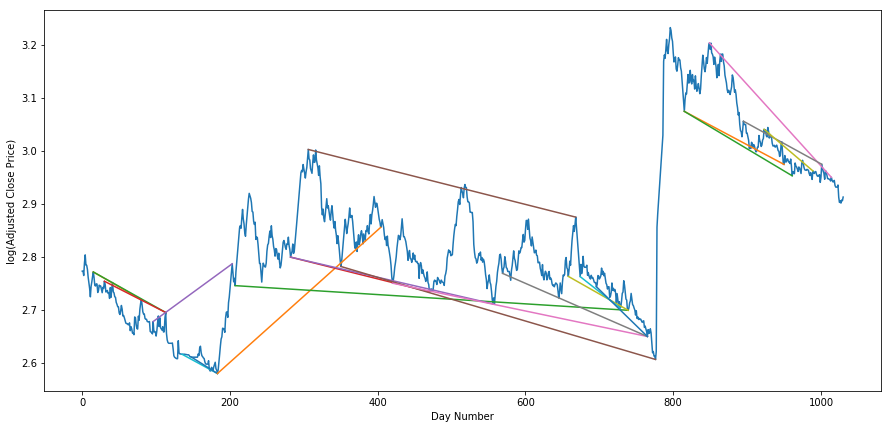

نمودار مربوط به ورنا و خطوط روند مربوط به آن 


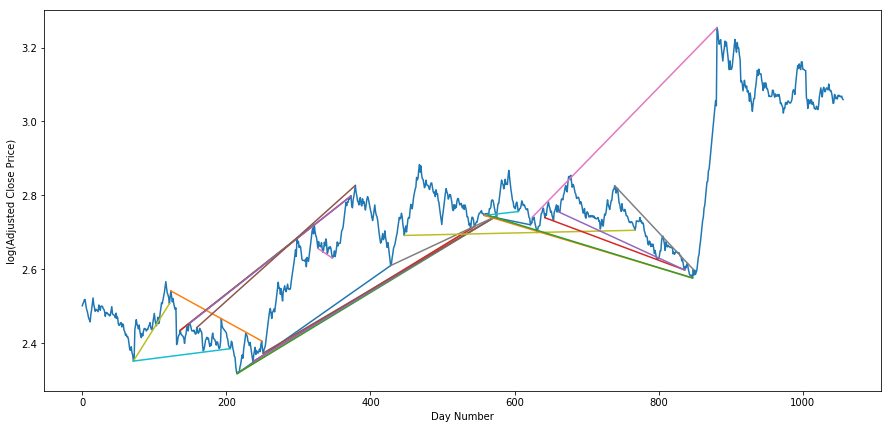

نمودار مربوط به خزامیا و خطوط روند مربوط به آن 


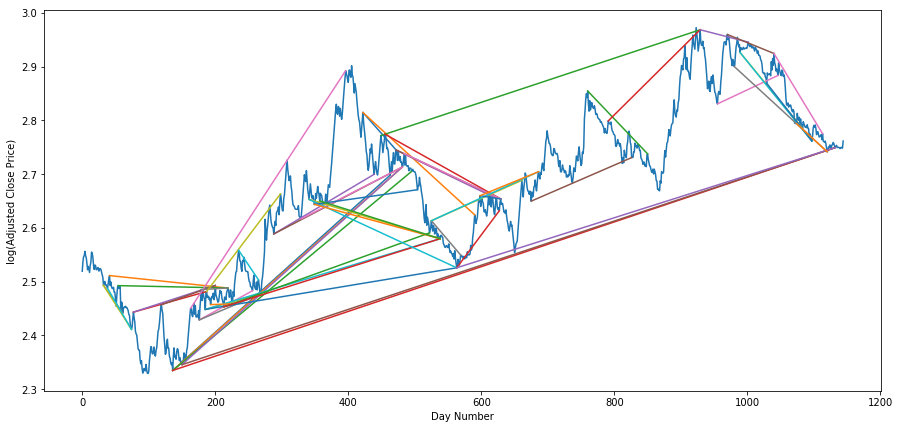

نمودار مربوط به خبهمن و خطوط روند مربوط به آن 


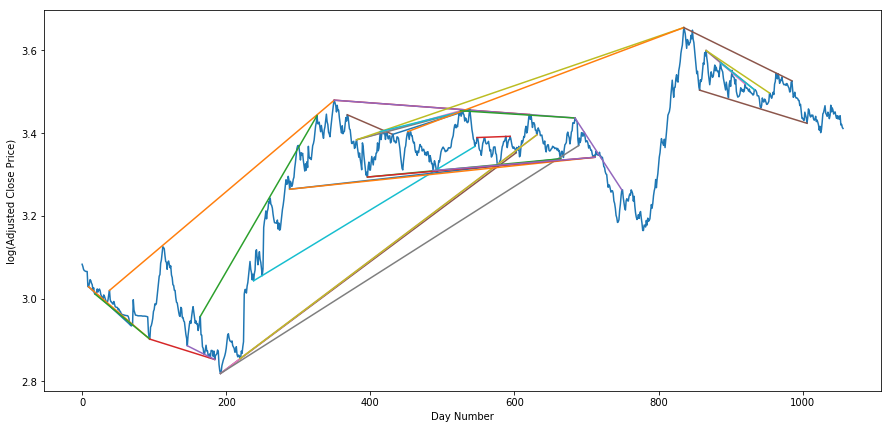

In [286]:
for i in range(len(df_panel)):
    yy = df_panel[i].log_adj_close.tolist()
    final_points_sup = find_trendlines(df_panel[i], mode = "sup", minimum_touch=3)
    final_points_res = find_trendlines(df_panel[i], mode = "res", minimum_touch=3)
    plt.figure(figsize = (15, 7))
    plt.plot(np.arange(len(df_panel[i])), df_panel[i].log_adj_close)
    for j in final_points_res:
        plt.plot([j[0],j[1]], [j[0]*j[2] +j[3], j[1]*j[2] +j[3]])
    print("نمودار مربوط به {} و خطوط روند مربوط به آن ".format(list(["خساپا", "خپارس","خودرو" ,"ورنا" , "خزامیا","خبهمن"])[i]))
       
    for j in final_points_sup:
        plt.xlabel("Day Number")
        plt.ylabel("log(Adjusted Close Price)")
        plt.plot([j[0],j[1]], [j[0]*j[2] +j[3], j[1]*j[2] +j[3]])
    plt.show()

### Cross correlation matrix between different features in a data frame 

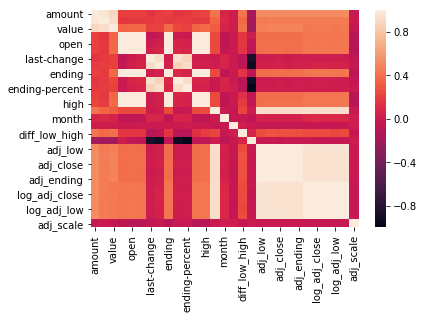

In [67]:
import seaborn as sns
sns.heatmap(df_panel[0].corr())
plt.show()

# Training a Regression model for each namad ! 

In [82]:
df_panel[0]

,date,name,amount,volume,value,lastday,open,close,last-change,last-percent,...,adj_high,adj_close,adj_open,adj_ending,log_adj_open,log_adj_close,log_adj_ending,log_adj_low,log_adj_high,adj_scale
239,3/24/2012,خساپا,18,433603,4.441051e+08,986,1006,1025,39,3.96,...,195.166117,195.166117,191.548404,190.977186,2.282279,2.290404,2.280981,2.282279,2.290404,1.0
240,3/25/2012,خساپا,47,231214,2.368620e+08,1003,1043,1018,15,1.50,...,198.593425,193.833276,198.593425,191.929216,2.297965,2.287428,2.283141,2.284002,2.297965,1.0
241,3/26/2012,خساپا,56,553041,5.546479e+08,1008,1030,1010,2,0.20,...,196.118147,192.310028,196.118147,191.357998,2.292518,2.284002,2.281847,2.274877,2.292518,1.0
242,3/27/2012,خساپا,54,481914,4.879160e+08,1005,983,1000,-5,-0.50,...,194.214087,190.405968,187.169067,192.119622,2.272234,2.279681,2.283572,2.272234,2.288281,1.0
243,3/28/2012,خساپا,33,295818,2.980340e+08,1009,1010,1006,-3,-0.30,...,193.833276,191.548404,192.310028,192.119622,2.284002,2.282279,2.283572,2.280115,2.287428,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,3/12/2017,خساپا,469,5917131,5.115644e+09,868,869,863,-5,-0.58,...,865.507745,858.543890,864.512909,861.528399,2.936771,2.933763,2.935270,2.929718,2.937271,1.0
1263,3/13/2017,خساپا,558,6811819,5.924702e+09,866,861,861,-5,-0.58,...,885.404475,856.554217,856.554217,864.512909,2.932755,2.932755,2.936771,2.932250,2.947142,1.0
1264,3/14/2017,خساپا,424,5718967,5.030284e+09,869,880,871,2,0.23,...,885.404475,866.502582,875.456110,871.476764,2.942234,2.937770,2.940256,2.936771,2.947142,1.0
1265,3/15/2017,خساپا,516,7209012,6.245449e+09,876,866,867,-9,-1.03,...,875.456110,862.523236,861.528399,863.518072,2.935270,2.935771,2.936271,2.929718,2.942234,1.0


نمودار قیمت کلوز (پایانی) سهام خساپا و خط رگرسیون فیت شده به آن 


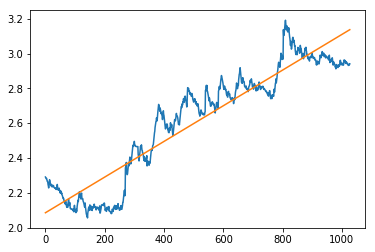

نمودار قیمت کلوز (پایانی) سهام خپارس و خط رگرسیون فیت شده به آن 


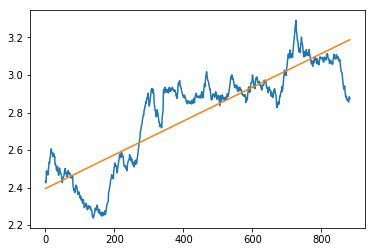

نمودار قیمت کلوز (پایانی) سهام خودرو و خط رگرسیون فیت شده به آن 


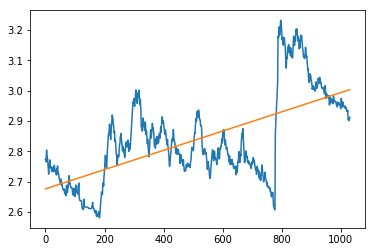

نمودار قیمت کلوز (پایانی) سهام ورنا و خط رگرسیون فیت شده به آن 


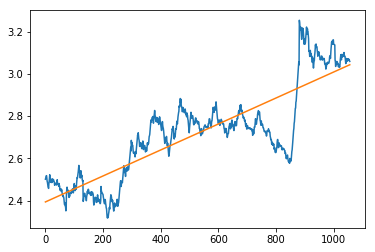

نمودار قیمت کلوز (پایانی) سهام خزامیا و خط رگرسیون فیت شده به آن 


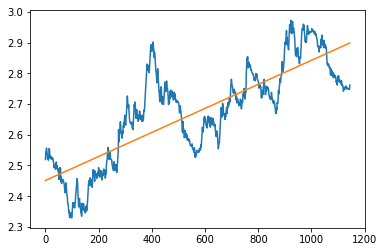

نمودار قیمت کلوز (پایانی) سهام خبهمن و خط رگرسیون فیت شده به آن 


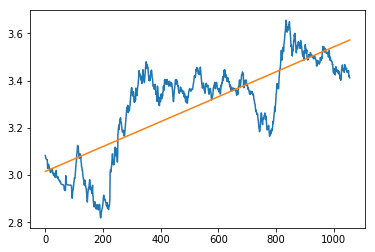

In [89]:

from sklearn.linear_model import LinearRegression
reg=[]
for i in range(len(df_panel)):
    print("نمودار قیمت کلوز (پایانی) سهام {} و خط رگرسیون فیت شده به آن ".format(list(["خساپا", "خپارس","خودرو" ,"ورنا" , "خزامیا","خبهمن"])[i]))
    reg.append(LinearRegression())
    y = list(df_panel[i].log_adj_close)
    x = list([[o] for o in range(len(df_panel[i].date))])
    reg[i].fit(x, y)
    plt.plot(x,y)
    plt.plot(x , [reg[i].intercept_+ j[0] *reg[i].coef_[0] for j in x])
    plt.show()

# Cross correlation matrix between different namads' close price ! 

## Defining a main df that include every six namads' close price

In [53]:
main_df = pd.DataFrame(df_panel[0].loc[:,["date","log_adj_close"]].values, 
                                             columns=["date","log_adj_close_{}".format(0)])
for i in range(1,len(df_panel)):
    main_df = pd.merge(main_df, pd.DataFrame(df_panel[i].loc[:,["date","log_adj_close"]].values, 
                                             columns=["date","log_adj_close_{}".format(i)]), on = "date", how="inner")
main_df = main_df.drop(["date"], axis = 1)

Here we're gonna visualize the correlation between six different company's stock price.
For creating a cross correlation matrix we've used the "log(adjusted close price) because logaritmic plot and adjusted price are the options which are popular between stock market analyst. Therefore we use the same approach for seeing the correlations.

We couldn't use persian words in the seaborn plots. You can see the real companies'names below : 
 * log_adj_close_0 : خساپا
 * log_adj_close_1 : خپارس
 * log_adj_close_2 : خودرو
 * log_adj_close_3 : ورنا
 * log_adj_close_4 : خزامیا
 * log_adj_close_5 : خبهمن
 


In [78]:
main_df.astype('float64').corr()

,log_adj_close_0,log_adj_close_1,log_adj_close_2,log_adj_close_3,log_adj_close_4,log_adj_close_5
log_adj_close_0,1.000000,0.972846,0.683009,0.889592,0.761531,0.886816
log_adj_close_1,0.972846,1.000000,0.667694,0.868832,0.723565,0.911960
log_adj_close_2,0.683009,0.667694,1.000000,0.883676,0.810063,0.775389
log_adj_close_3,0.889592,0.868832,0.883676,1.000000,0.780317,0.897629
log_adj_close_4,0.761531,0.723565,0.810063,0.780317,1.000000,0.751319
log_adj_close_5,0.886816,0.911960,0.775389,0.897629,0.751319,1.000000


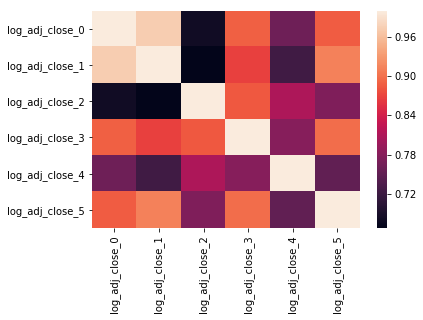

In [77]:
sns.heatmap(main_df.astype('float64').corr())

# The last step : the GREAT K-MEANS :)

## Feature generation

We're gonna cluster these 6 comapnies based on some features:
1. the slope of the stock's regression line. 
2. the oscilation the regression line. ( MSE of the model ) 
3. number of trendlines - this feature shows that how much a company tends to technical behaviours.


In [ ]:
from sklearn.metrics import mean_squared_error
MSE=[]
slope=[]
number_of_trendlines=[]

for i in range(len(df_panel)):
    y = list(df_panel[i].log_adj_close)
    x = list([[o] for o in range(len(df_panel[i].date))])
    slope.append(reg[i].coef_[0])
    MSE.append(mean_squared_error(reg[i].predict(x),y))
    
    final_points_sup = find_trendlines(df_panel[i], mode = "sup", minimum_touch=3)
    final_points_res = find_trendlines(df_panel[i], mode = "res", minimum_touch=3)
    number_of_trendlines.append(len(final_points_res)+len(final_points_sup))
    
    
    

In [101]:
main_df = pd.DataFrame([],columns=["slope","MSE","number_of_trendlines"])
for i in range(len(df_panel)):
    main_df = main_df.append({"slope":slope[i], "MSE": MSE[i], "number_of_trendlines": number_of_trendlines[i]}, ignore_index=True)

In [103]:
main_df

,slope,MSE,number_of_trendlines
0,0.001024,0.013259,52.0
1,0.000899,0.016384,18.0
2,0.000318,0.013418,22.0
3,0.000615,0.013990,24.0
4,0.000391,0.008561,61.0
5,0.000527,0.015467,35.0


## Normalizing features for K-Means

In [104]:
from sklearn.preprocessing import normalize
normalized_main_df = pd.DataFrame(normalize(main_df,axis=0),columns=main_df.columns)

In [105]:
normalized_main_df

,slope,MSE,number_of_trendlines
0,0.615668,0.393988,0.547096
1,0.540468,0.486858,0.189379
2,0.190984,0.398718,0.231464
3,0.369916,0.415715,0.252506
4,0.235153,0.254397,0.641785
5,0.316603,0.459597,0.368237


## Constructing the model 

In [106]:
from sklearn.cluster import KMeans

D:\Programs\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:31: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is 

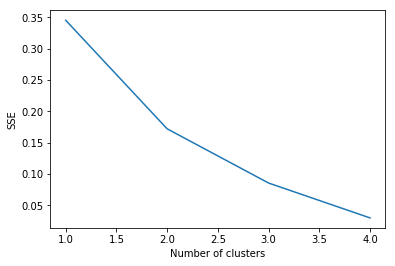

In [108]:
data = normalized_main_df.values
sse = {}
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, max_iter=200)
    kmeans.fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

## k=3 is the best 

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=200)
kmeans.fit(data)

In [112]:
main_df["cluster_number"] = kmeans.predict(normalized_main_df)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [113]:
main_df

,slope,MSE,number_of_trendlines,cluster_number
0,0.001024,0.013259,52.0,2
1,0.000899,0.016384,18.0,0
2,0.000318,0.013418,22.0,0
3,0.000615,0.013990,24.0,0
4,0.000391,0.008561,61.0,1
5,0.000527,0.015467,35.0,0
